# 퍼셉트론이란?
* 입력된 다수에 데이터에 대해 어떠한 처리( 가중치 $w$ )를 곱해서 출력 하나($y$)를 내는 것

$$
y = \begin{cases}
0 \enspace (w_1x_1 + w_2x_2 \leq \theta)
\\ 1 \enspace (w_1x_1 + w_2x_2 > \theta) \end{cases}
$$

위 수식을 반응 조건 계산식 이라고 한다.

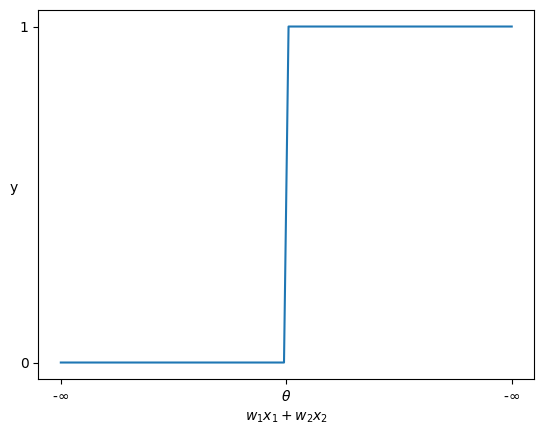

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# func : 퍼셉트론
def func(x1, x2):
  # 임의의 가중치인 w1, w2를 지정
  # 임의의 임계값인 theta를 지정
  w1, w2, theta = 0.5, 0.5, 2
  y = w1*x1 + w2*x2

  return y, y >= theta

# 입력 데이터 생성
x1 = np.linspace(-3, 7, 100)
x2 = np.linspace(-3, 7, 100)

# 퍼셉트론의 결과물 구하기
y_value, y_result = func(x1, x2)

# 시각화
plt.plot(y_value, y_result)
plt.yticks([0, 1])
plt.xticks([-3,2,7], [r'-$\infty$', r'$\theta$', r'-$\infty$'])
plt.xlabel(r"$w_1x_1+w_2x_2$")
plt.ylabel("y", rotation=0)
plt.show()

## AND 게이트 구현

In [5]:
def AND_gate(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    z = w1*x1 + w2*x2

    return int(z > theta)

In [26]:
x_list = [0,1]
y_list = [0,1]

def test_gate(gate):
    for x in x_list:
        for y in y_list:
            print(gate(x, y))

In [27]:
x_list = [0,1]
y_list = [0,1]

test_gate(AND_gate)

0
0
0
1


$\theta$를 기준으로 $w_1x_1 + w_2x_2$의 결과가 0 또는 1로 결정지어 진다. 이걸 일반화 시켜 어느 상황에서든 **반응 조건 계산식**을 활용할 수 있도록 일반화 시켜보기

* 원래 수식

 * $
y = \begin{cases}
0 \enspace (w_1x_1 + w_2x_2 \leq \theta)
\\ 1 \enspace (w_1x_1 + w_2x_2 > \theta) \end{cases}
$

* 바뀐 수식

 * $
y = \begin{cases}
0 \enspace (w_1x_1 + w_2x_2 -\theta \leq 0)
\\ 1 \enspace (w_1x_1 + w_2x_2 -\theta > 0) \end{cases}
$

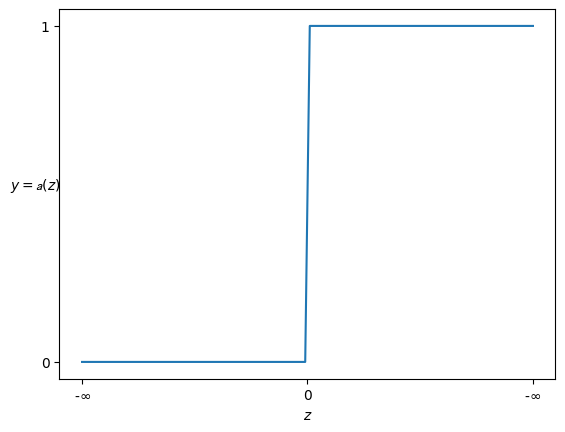

In [9]:
z = np.linspace(-3, 3, 100)
plt.plot(z, z > 0)
plt.yticks([0, 1])
plt.xticks([-3, 0, 3],[r'-$\infty$', r'$0$', r'-$\infty$'])
plt.xlabel(r"$z$")
plt.ylabel(r"$y=\mathcal{a}(z)$", rotation=0)
plt.show()

In [13]:
def AND_gate_general(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    z = w1*x1 + w2*x2 - theta

    return int(z > 0)

In [28]:
test_gate(AND_gate_general)

0
0
0
1


* $
y = \begin{cases}
0 \enspace (w_1x_1 + w_2x_2 -\theta \leq 0)
\\ 1 \enspace (w_1x_1 + w_2x_2 -\theta > 0) \end{cases}
$

  * $-\theta$를 $b$로 변경한다.( $\theta$ = $-b$)

* $
y = \begin{cases}
0 \enspace (w_1x_1 + w_2x_2 +b \leq 0)
\\ 1 \enspace (w_1x_1 + w_2x_2 +b > 0) \end{cases}
$

* $z = w_1x_1 + w_2x_2 +b$

* $
y = \begin{cases}
0 \enspace (z \leq 0)
\\ 1 \enspace (z > 0) \end{cases}
$

* $
a(z) = \begin{cases}
0 \enspace (z \leq 0)
\\ 1 \enspace (z > 0) \end{cases}
$

* $y=a(z)$
* 함수$a$를 **단위 계단 함수**

## 여러 개의 입력이 있다고 가정한다면??
* $X=[x_1, x_2, x_3, ...]$
* $W=[w_1, w_2, w_3, ...]$
* $b$
* $z = WX + b$

In [18]:
x = np.array([0,1])
w = np.array([0.5, 0.5])
b = -0.7 # bias 는 threshold 의 음수
z = w @ x + b

z, z > 0

(-0.19999999999999996, False)

In [19]:
def AND_gate_numpy(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7

    z = w @ x + b # 입력값 벡터와 가중치 벡터의 내적
    return int(z > 0)

In [29]:
test_gate(AND_gate_numpy)

0
0
0
1


### 가중치와 편향에 대한 의미
* 가중치 : 입력값에 대한 중요도
  * 입력된 데이터에 대해 결과물이 1로 가거나, 0으로 갈 수 있도록 입력값을 조절하는 변수
* 편향 : 퍼셉트론이 얼마나 **쉽게 활성화가 되는가**를 결정
  * 활성화? 퍼셉트론의 결과물이 1이 되는것, $z$가 0을 넘어가는 것
  * 편향이 크다면 입력 데이터나 가중치가 아무리 작아도 쉽게 활성화가 된다.
    * 흥분도가 큰 퍼셉트론 - 민감한 퍼셉트론
  * 편향이 작다면 입력 데이터나 가중치가 아무리 커도 쉽게 활성화가 되지 않는다.
    * 흥분도가 낮은 퍼셉트론 - 둔감한 퍼셉트론

## NAND 게이트 구현

In [23]:
def NAND_gate(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7

    z = w @ x + b
    return int(z > 0)

In [30]:
test_gate(NAND_gate)

1
1
1
0


## OR 게이트
* AND_gate 의 매개변수를 적절히 조절해 준다

In [36]:
def OR_gate(x1, x2):
    x = np.array([x1, x2])

    w = np.array([0.5, 0.5])
    b = -0.3

    z = w @ x + b
    return int(z > 0)

In [37]:
test_gate(OR_gate)

0
1
1
1


## MLP
* 단층 퍼셉트론을 여러 개 쌓아 하나의 퍼셉트론 만으로 해결 불가능한 문제를 해결

In [42]:
def XOR_gate(x1, x2):
    s1 = NAND_gate(x1, x2)
    s2 = OR_gate(x1, x2)

    return AND_gate(s1, s2)

In [43]:
test_gate(XOR_gate)

0
1
1
0
